# 06. Model Explanation

Notebook này giải thích mô hình sử dụng:
- Feature Importance
- SHAP values (if available)
- Sample predictions

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import project modules
import sys
from pathlib import Path

# Calculate project root by finding directory with config folder
current_path = Path().resolve()
project_root = current_path

# Find project root by looking for config/ directory
max_levels = 5
for _ in range(max_levels):
    if (project_root / 'config').exists() and (project_root / 'src').exists():
        break
    if project_root.parent == project_root:
        break
    project_root = project_root.parent
else:
    if 'notebooks' in str(current_path):
        project_root = current_path.parent

# Add src to Python path
src_path = project_root / 'src'
if src_path.exists():
    sys.path.insert(0, str(src_path))

from models.random_forest import load_model, get_feature_importance
from evaluation.visualization import plot_feature_importance

## 1. Load Model and Data

In [2]:
# Load model
rf_model = load_model('random_forest.pkl')

# Load test data
processed_dir = project_root / "data" / "processed"
X_test = pd.read_csv(processed_dir / "X_test.csv")
y_test = pd.read_csv(processed_dir / "y_test.csv").squeeze()

print("Model and data loaded!")

Model and data loaded!


## 2. Feature Importance

Top 10 Most Important Features:
1. PageValues: 0.3940
2. ExitRates: 0.0965
3. ProductRelated_Duration: 0.0922
4. ProductRelated: 0.0698
5. Month: 0.0605
6. BounceRates: 0.0549
7. Administrative_Duration: 0.0511
8. Administrative: 0.0367
9. TrafficType: 0.0268
10. Region: 0.0248


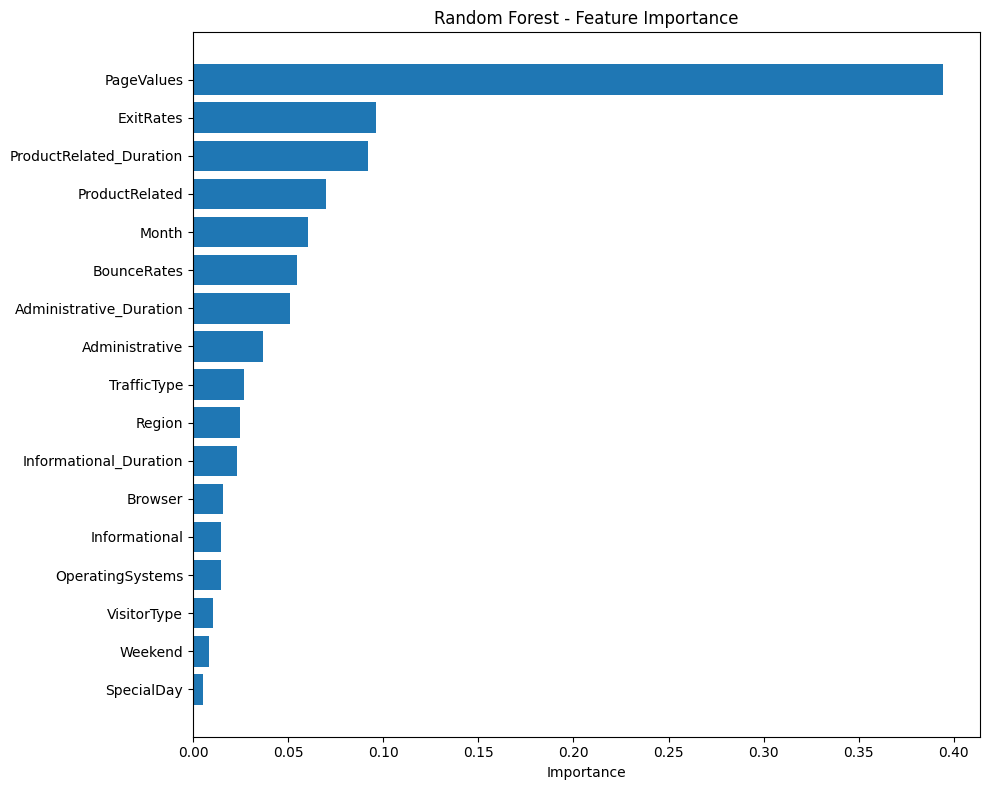

In [3]:
# Get feature importance
feature_names = X_test.columns.tolist()
importance_dict = get_feature_importance(rf_model, feature_names)

# Sort by importance
importance_sorted = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

print("Top 10 Most Important Features:")
for i, (feat, imp) in enumerate(list(importance_sorted.items())[:10], 1):
    print(f"{i}. {feat}: {imp:.4f}")

# Visualize
importances = [importance_dict[feat] for feat in feature_names]
plot_feature_importance(importances, feature_names, top_n=20, title='Random Forest - Feature Importance')

## 3. SHAP Values (Optional)

In [ ]:
# Uncomment to use SHAP
# import shap
# 
# # Create SHAP explainer
# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_test[:100])  # Use sample for speed
# 
# # Summary plot
# shap.summary_plot(shap_values[1], X_test[:100], show=False)
# plt.title('SHAP Summary Plot')
# plt.show()